# Clustering Analysis

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms
### Objective : 
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


### Task-1 Data Preprocessing :
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the datast


#### Load and Read The Dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [2]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df=df.rename(columns={'ID#':'ID','Award?':'Award'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


#### 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [6]:
df.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [7]:
#Checking for null Values
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
# Excluding 'ID' and 'Award' as it is just an identifier
df=df.drop(columns=['ID'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


#### 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

#### Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

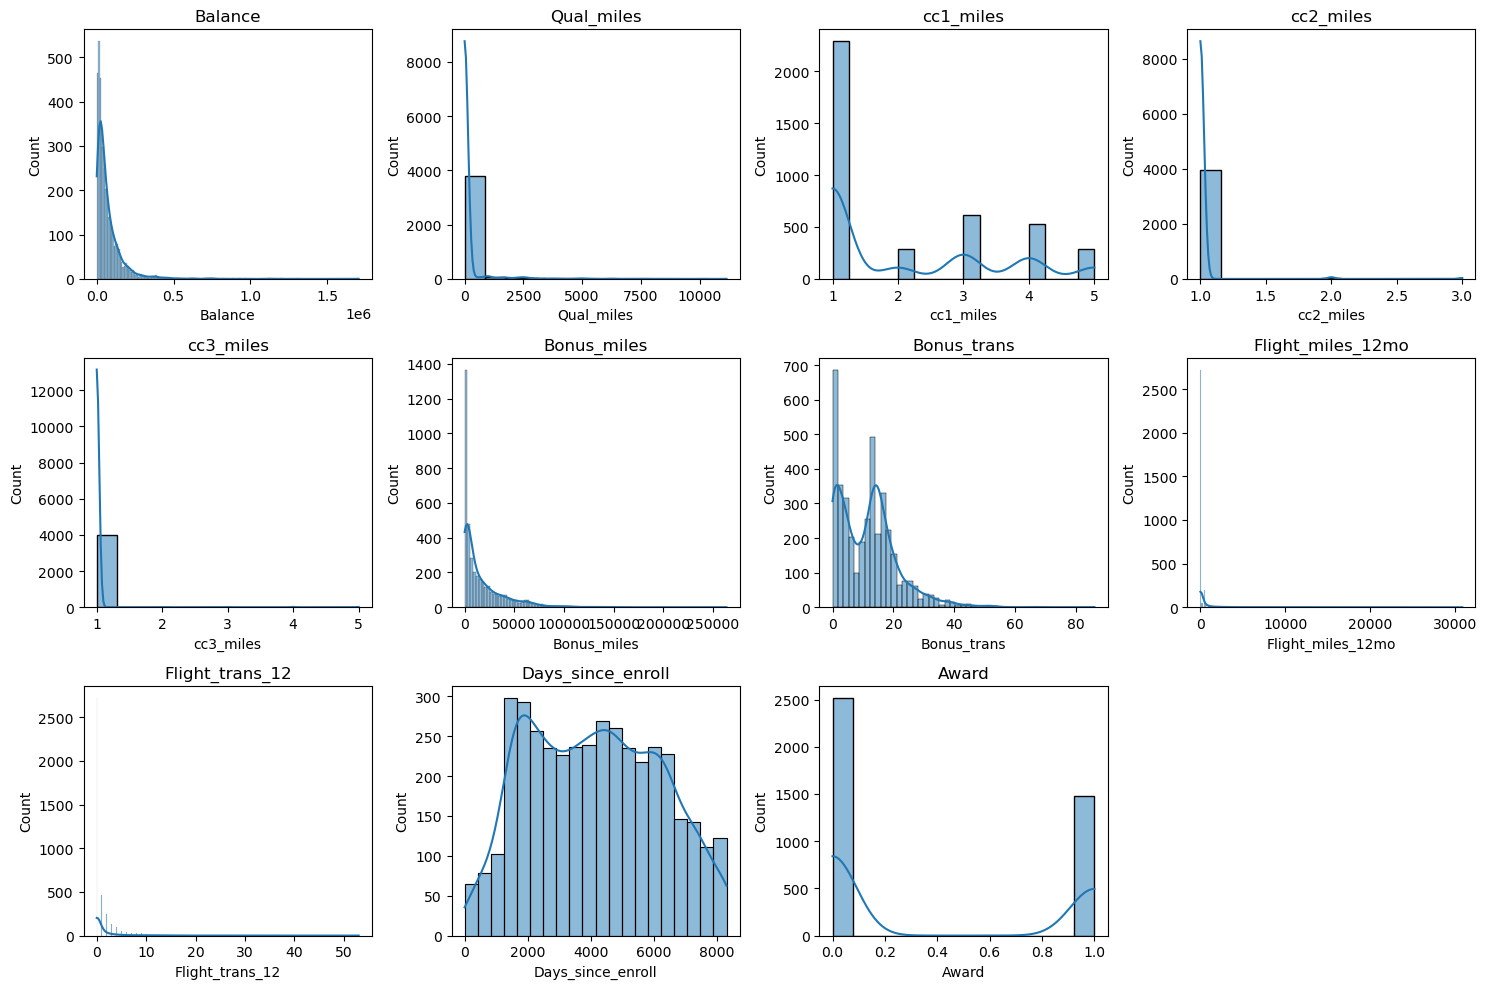

In [11]:
# Plot feature distributions
plt.figure(figsize=(15,10))
for i,column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column],kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

#### 3.Use multiple visualizations to understand the hidden patterns in the datast

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Histograms

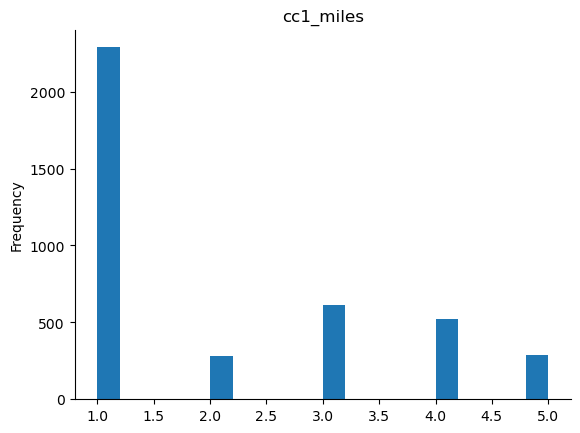

In [13]:
df['cc1_miles'].plot(kind='hist',bins=20,title='cc1_miles')
plt.gca().spines[['top','right',]].set_visible(False)

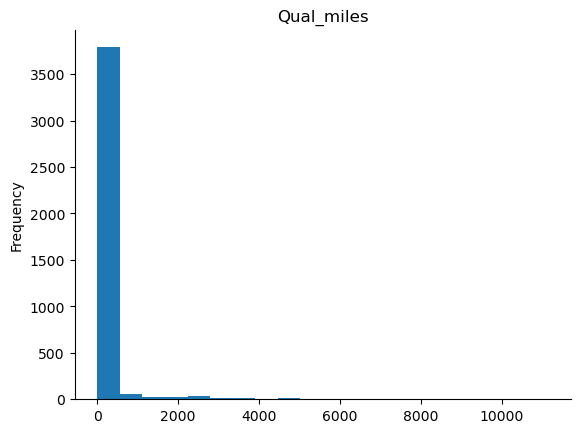

In [14]:
df['Qual_miles'].plot(kind='hist',bins=20,title='Qual_miles')
plt.gca().spines[['top','right',]].set_visible(False)

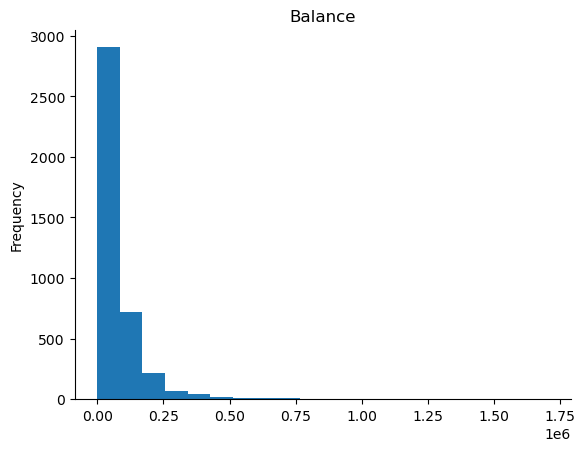

In [15]:
df['Balance'].plot(kind='hist',bins=20,title='Balance')
plt.gca().spines[['top','right',]].set_visible(False)

#### Box Plots

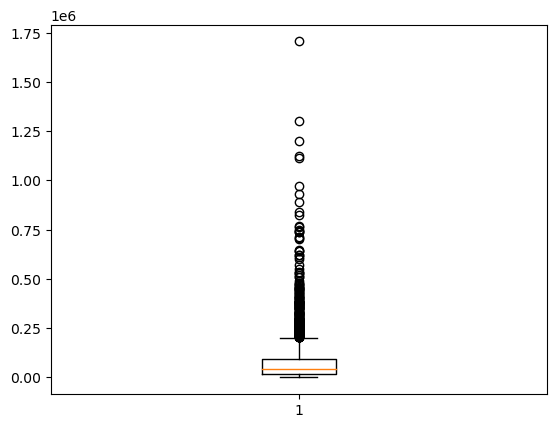

In [16]:
plt.boxplot(df['Balance'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24afae5f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24afae5fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24afae5f520>],
 'medians': [<matplotlib.lines.Line2D at 0x24afae6e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x24afae6e520>],
 'means': []}

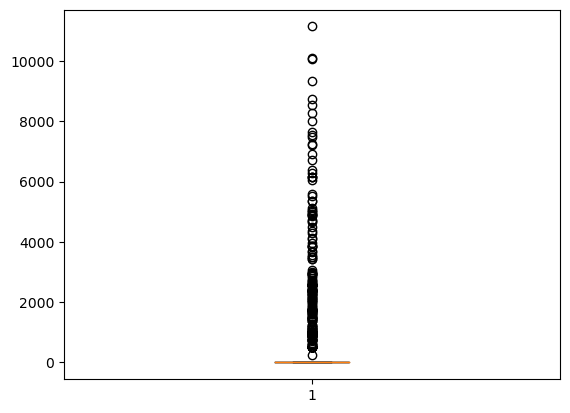

In [17]:
plt.boxplot(df['Qual_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24afaec2760>,
 'caps': [<matplotlib.lines.Line2D at 0x24afaec2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x24afaec25b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24afaece2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24afaece5b0>],
 'means': []}

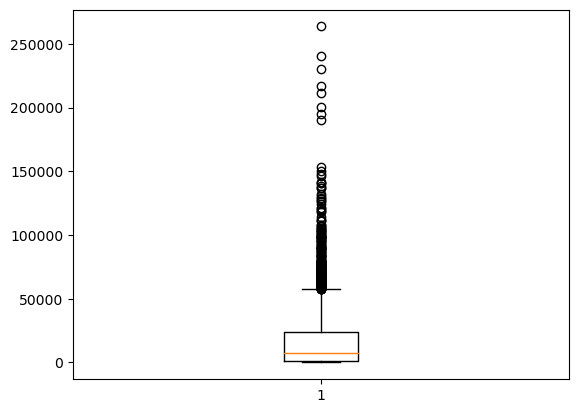

In [18]:
plt.boxplot(df['Bonus_miles'])

In [19]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<AxesSubplot:>

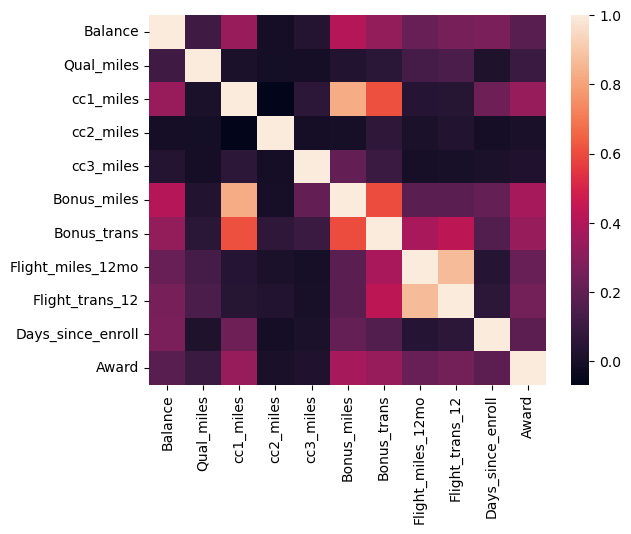

In [20]:
sns.heatmap(df.corr())

### Task-2 Implementing Clustering Algorithms:
1. 	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB
2. Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.s.


In [21]:
df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist

#### 1.Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

#### 2.Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data..

### K-Means

#### Scale Features

In [23]:
scaler=StandardScaler()
scaleData=scaler.fit_transform(df)

In [24]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(scaleData)
df['KMeans_Cluster']=labels

#### Hierarchical Clustering

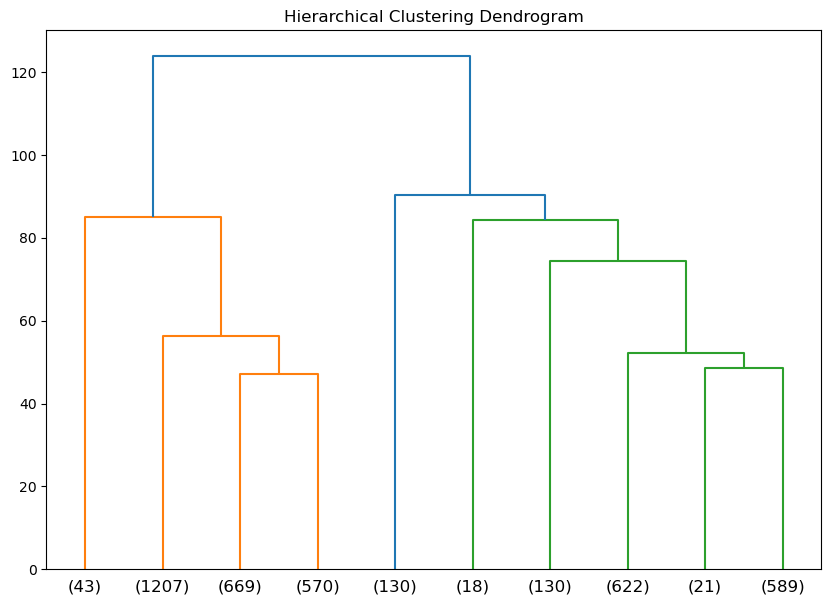

In [25]:
linked=linkage(scaleData,method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked,truncate_mode='lastp',p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [26]:
hierarchical_labels=fcluster(linked,3,criterion='maxclust')
df['Hierarchical_Cluster']=hierarchical_labels

#### DBSCAN Clustering

In [27]:
# Applying DBSCAN Clustering.
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(scaleData)
df['DBSCAN_Cluster']=dbscan_labels

#### 3.Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.s.

#### Linkage Criteria

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

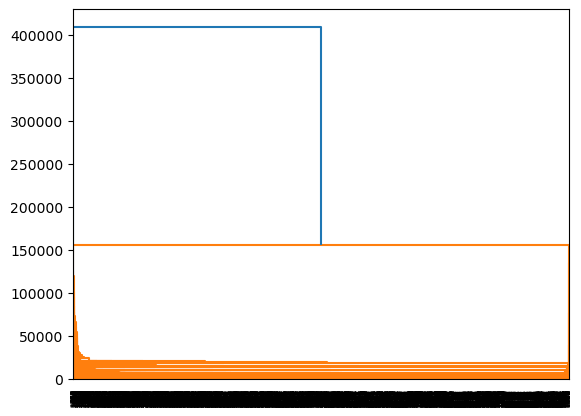

In [29]:
dendrogram=sch.dendrogram(sch.linkage(df,method='single'))

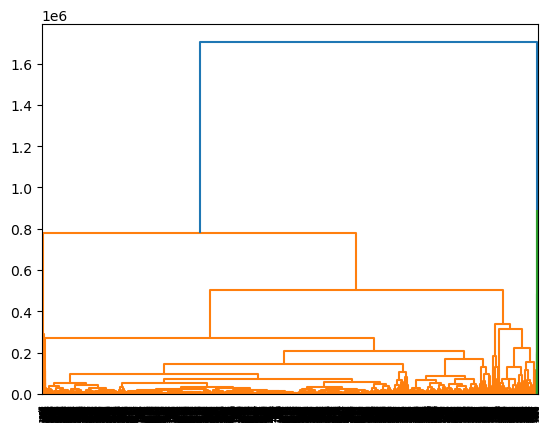

In [30]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

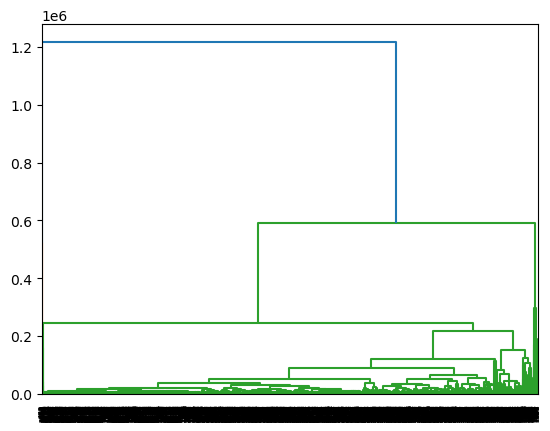

In [31]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))

In [33]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [34]:
y_hc=hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


### Task-3 Cluster Analysis and Interpretation:
Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [35]:
# Analyzing each cluster by printing the descriptive statistics

for cluster in range(3):
    print(f"Cluster{cluster}:")
    print(df[df['KMeans_Cluster']==cluster].describe())
    print("\n")

Cluster0:
            Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  1.259000e+03   1259.000000  1259.000000  1259.000000  1259.000000   
mean   1.169787e+05    156.820492     3.731533     1.002383     1.034154   
std    1.193371e+05    835.177888     0.923659     0.048776     0.330644   
min    3.290000e+02      0.000000     1.000000     1.000000     1.000000   
25%    4.558050e+04      0.000000     3.000000     1.000000     1.000000   
50%    8.491400e+04      0.000000     4.000000     1.000000     1.000000   
75%    1.447090e+05      0.000000     4.000000     1.000000     1.000000   
max    1.125076e+06  11148.000000     5.000000     2.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    1259.000000  1259.000000        1259.000000      1259.000000   
mean    40417.577442    18.960286         342.454329         1.011914   
std     27240.833294     7.062182         644.777352         1.827806   
min      2500

### Task-4 Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


Text(0.5, 1.0, 'K-Means Clustering')

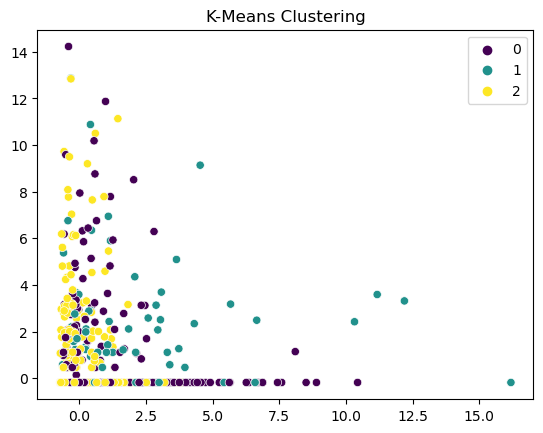

In [36]:
# Scatter Plot for KMeans Clustering.
sns.scatterplot(x=scaleData[:,0],y=scaleData[:,1],hue=labels,palette='viridis')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

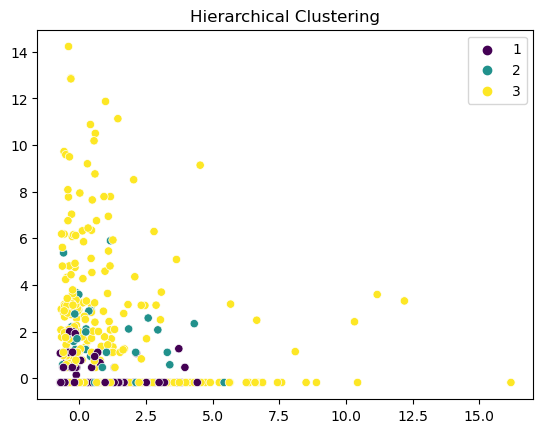

In [37]:
# Scatter Plot for Hierarchical Clustering.
sns.scatterplot(x=scaleData[:,0],y=scaleData[:,1],hue=hierarchical_labels,palette='viridis')
plt.title('Hierarchical Clustering')

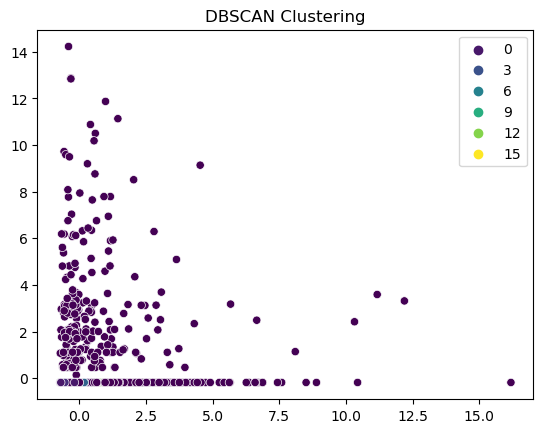

In [38]:
# Scatter Plot for DBSCAN Clustering.
sns.scatterplot(x=scaleData[:,0],y=scaleData[:,1],hue=dbscan_labels,palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

### Task-5 Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [39]:
# Calculating silhouette score for K-Means.
kmeans_silhouette=silhouette_score(scaleData,labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.31120106054803415


In [40]:
# Calculating silhouette score for DBSCAN.
dbscan_silhouette=silhouette_score(scaleData[dbscan_labels!= -1],dbscan_labels[dbscan_labels!=-1])
print(f'DBSCAN Silhouette Score:{dbscan_silhouette}')

DBSCAN Silhouette Score:0.14397923390835202
